In [1]:
# data analysis libraries
import pandas as pd
import numpy as np
import random as rnd

# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# cModel design
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#loading the dataset
dataset = pd.read_csv("C:/Users/Admin/OneDrive - Strathmore University/school work/STRATHMORE UNIVERSITY(BBIT)/BBIT EXEMPT 3.2/Artificial Intelligencence (AI)/project/ANN Implementation/kc_house_data.csv")

In [ ]:
#analysing the features in the dataset
print(dataset.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [ ]:
#checking for null values
dataset.isnull().sum() #counting all the values ine ach column to check for any missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#checking the datatype of all the columns(features)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Data preprocessing is important before modelling. This may include dimensionality reduction(dropping feartures that are not important in predicting the outcome),splitting the dataset into training and testing etc. 

In [ ]:
#Dropping ID and Zip code columns
df = dataset.drop('id', axis=1)
df = dataset.drop('zipcode',axis=1)

In [ ]:
#Feature engineering. This important in separating the date column into month and year columns
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
df = df.drop('date',axis=1)

In [ ]:
#We can now view the new columns
print(df.columns.values)

['id' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


In [ ]:
#specifying the independent and dependent variables
X = df.drop('price',axis=1)#the faeture set includes all the columns except the price, so we drop it
y = df['price'] #depenedent variabele as the aim of the model is to predict the price

In [ ]:
#splitting the dataset into train and validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101) #test size is 20% of the total dataset

In [ ]:
#Data normalization/scaling
scaler = MinMaxScaler()
# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


The number of neurons (units) are estimated from our features. Ex: X_train.shape (15117, 19). In this case we are using the Adam optimizer and the mean square error loss function for model training and validation respectifully.Remember that a neural network model has three major layers i.e input layer, hidden layer and output layer. 

In [ ]:
model = Sequential()#from keras and tnsorflow libraries
# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
#lets visaulaize the model
print(model)

After model design, we now do the training. This is done by fitting the model onto the training data using the model.fit function. We will also use sample represenations(batches) since the dataset is large. Batches are of the order 2 (32, 64, 128, 256...). The choice of the batch is experimental but the smaller the batch the longer the model takes to train. In our case, we use a batch size of 128. 

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)#the epochs are the number of traing iterations

Epoch 1/400
136/136 [==============================] - 4s 8ms/step - loss: 426731798528.0000 - val_loss: 425142353920.0000
Epoch 2/400
136/136 [==============================] - 1s 6ms/step - loss: 424234975232.0000 - val_loss: 416514965504.0000
Epoch 3/400
136/136 [==============================] - 1s 4ms/step - loss: 391427391488.0000 - val_loss: 343480303616.0000
Epoch 4/400
136/136 [==============================] - 0s 3ms/step - loss: 257607811072.0000 - val_loss: 163186311168.0000
Epoch 5/400
136/136 [==============================] - 0s 3ms/step - loss: 119841464320.0000 - val_loss: 104294072320.0000
Epoch 6/400
136/136 [==============================] - 1s 5ms/step - loss: 102391668736.0000 - val_loss: 102165733376.0000
Epoch 7/400
136/136 [==============================] - 1s 6ms/step - loss: 100563394560.0000 - val_loss: 100324966400.0000
Epoch 8/400
136/136 [==============================] - 0s 3ms/step - loss: 98710093824.0000 - val_loss: 98445000704.0000
Epoch 9/400
136/13

Training loss per epoch
-This plot shows the training loss per epoch.
-This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time.

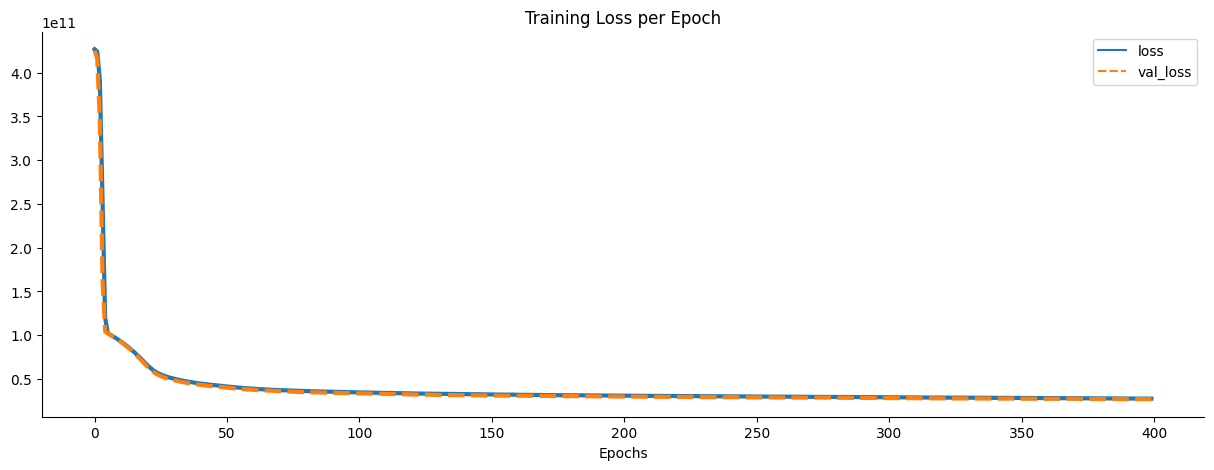

In [ ]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

For model evaluation, we are going to use the metrics for regression i.e Mean Absolute Error (MAE),Mean Squared Error (MSE) and the Root Mean Squared Error. 

In [ ]:
# predictions on the test set
predictions = model.predict(X_test)
print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
print('\n\nDescriptive Statistics:\n',df['price'].describe())

136/136 [==============================] - 0s 2ms/step
MAE:  102412.02010141974
MSE:  27093513286.640953
RMSE:  164601.07316369767
Variance Regression Score:  0.8024585371958545


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


Model predictions vs perfect fit
-We can compare the model predictions with a perfect fit to see how accurate the model is.
-The red line represents the perfect prediction.
-We are being punish by the outliers, which are the expensive houses. Our model is not good predicting luxury houses.
-On the other hand, our model is good predicting the price of houses between o and $2 million. There is clearly a good fit.
-It may be worth it retraining our model just on price houses below $3 million.

ValueError: cannot reshape array of size 4323 into shape (6484,1)

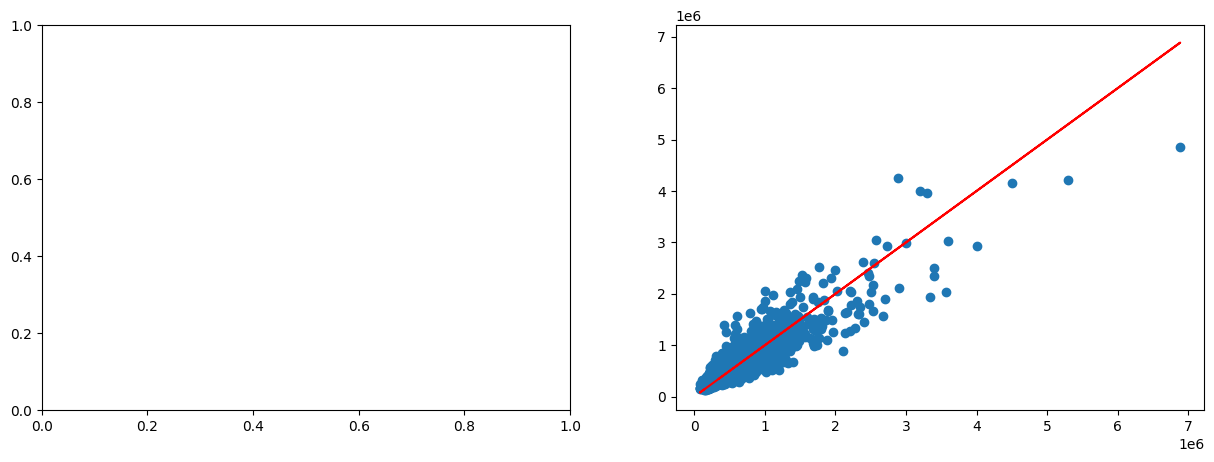

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
# Our model predictions
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')
errors = y_test.values.reshape(6484, 1) - predictions
sns.distplot(errors, ax=axes[0])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

Predicting on a brand new house
-We are going to use the model to predict the price on a brand-new house. We are going to choose the first house of the data ---set and drop the price. single_house is going to have all the features that we need to predict the price. After that we need to reshape the variable and scale the features.
-The original price is $221,900 and the model prediction is \$280,000.

In [ ]:
## fueatures of new house
single_house = df.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')
# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 20))
# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])
# original price
print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
id               7.129301e+09
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
month            1.000000e+01
year             2.014000e+03
Name: 0, dtype: float64
1/1 [==============================] - 0s 36ms/step

Prediction Price: 281360.78

Original Price: 221900.0


C:\Users\HP USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
